In [6]:
# Accion Wells Fargo
tickerSymbol = "TGT"

# Rango de fecha
startDate = '2018-05-15' #  strings
endDate = '2023-05-15' #  strings

In [7]:
# Librerias
import sys 
import yfinance as yf
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [8]:
# Accion Wells Fargo
tickers = ["TGT", "^VIX", "^TNX", "GLD", "^BCOM", "^FVX", "DX-Y.NYB", ]
data = yf.download(tickers, start="2018-05-15", end="2023-05-15", group_by="ticker")
print(data)

[*********************100%***********************]  7 of 7 completed
             ^FVX                                             ^BCOM  \
             Open   High    Low  Close Adj Close Volume        Open   
Date                                                                  
2018-05-15  2.879  2.936  2.876  2.925     2.925    0.0   90.419998   
2018-05-16  2.910  2.934  2.907  2.934     2.934    0.0   90.029999   
2018-05-17  2.938  2.941  2.920  2.932     2.932    0.0   90.290001   
2018-05-18  2.926  2.928  2.888  2.892     2.892    0.0   90.379997   
2018-05-21  2.910  2.910  2.892  2.898     2.898    0.0   90.800003   
...           ...    ...    ...    ...       ...    ...         ...   
2023-05-08  3.476  3.502  3.453  3.500     3.500    0.0  103.070000   
2023-05-09  3.474  3.524  3.471  3.495     3.495    0.0  103.209999   
2023-05-10  3.498  3.552  3.359  3.373     3.373    0.0  103.440002   
2023-05-11  3.347  3.366  3.282  3.359     3.359    0.0  102.629997   
2023-05-

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.head()

^FVX                                            ^BCOM             \
             Open   High    Low  Close Adj Close Volume       Open       High   
Date                                                                            
2018-05-15  2.879  2.936  2.876  2.925     2.925    0.0  90.419998  90.660004   
2018-05-16  2.910  2.934  2.907  2.934     2.934    0.0  90.029999  90.190002   
2018-05-17  2.938  2.941  2.920  2.932     2.932    0.0  90.290001  90.720001   
2018-05-18  2.926  2.928  2.888  2.892     2.892    0.0  90.379997  90.709999   
2018-05-21  2.910  2.910  2.892  2.898     2.898    0.0  90.800003  91.050003   

                                  ...   ^VIX                           ^TNX  \
                  Low      Close  ...    Low  Close Adj Close Volume   Open   
Date                              ...                                         
2018-05-15  89.629997  90.120003  ...  12.50  14.63     14.63    0.0  3.026   
2018-05-16  89.809998  90.180000  ...  13.21  13.42     13.42    0.0  3.061   
2018-05-17  90.230003  90.309998  ...  12.65  13.43     13.43    0.0  3.106   
2018-05-18  90.349998  90.410004  ...  13.06  13.42     13.42    0.0  3.104   
2018-05-21  90.510002  90.970001  ...  12.78  13.08     13.08    0.0  3.076   

                                                  
             High    Low  Close Adj Close Volume  
Date                                              
2018-05-15  3.095  3.023  3.080     3.080    0.0  
2018-05-16  3.095  3.058  3.095     3.095    0.0  
2018-05-17  3.115  3.093  3.109     3.109    0.0  
2018-05-18  3.106  3.065  3.067     3.067    0.0  
2018-05-21  3.078  3.058  3.065     3.065    0.0  

[5 rows x 42 columns]

In [11]:
#Merging multi index columns
data.columns = data.columns.map('|'.join).str.strip('|')

print(data)

            ^FVX|Open  ^FVX|High  ^FVX|Low  ^FVX|Close  ^FVX|Adj Close  \
Date                                                                     
2018-05-15      2.879      2.936     2.876       2.925           2.925   
2018-05-16      2.910      2.934     2.907       2.934           2.934   
2018-05-17      2.938      2.941     2.920       2.932           2.932   
2018-05-18      2.926      2.928     2.888       2.892           2.892   
2018-05-21      2.910      2.910     2.892       2.898           2.898   
...               ...        ...       ...         ...             ...   
2023-05-08      3.476      3.502     3.453       3.500           3.500   
2023-05-09      3.474      3.524     3.471       3.495           3.495   
2023-05-10      3.498      3.552     3.359       3.373           3.373   
2023-05-11      3.347      3.366     3.282       3.359           3.359   
2023-05-12      3.376      3.453     3.355       3.451           3.451   

            ^FVX|Volume  ^BCOM|Open  

In [12]:
data.head()

,^FVX|Open,^FVX|High,^FVX|Low,^FVX|Close,^FVX|Adj Close,^FVX|Volume,^BCOM|Open,^BCOM|High,^BCOM|Low,^BCOM|Close,...,^VIX|Low,^VIX|Close,^VIX|Adj Close,^VIX|Volume,^TNX|Open,^TNX|High,^TNX|Low,^TNX|Close,^TNX|Adj Close,^TNX|Volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15,2.879,2.936,2.876,2.925,2.925,0.0,90.419998,90.660004,89.629997,90.120003,...,12.50,14.63,14.63,0.0,3.026,3.095,3.023,3.080,3.080,0.0
2018-05-16,2.910,2.934,2.907,2.934,2.934,0.0,90.029999,90.190002,89.809998,90.180000,...,13.21,13.42,13.42,0.0,3.061,3.095,3.058,3.095,3.095,0.0
2018-05-17,2.938,2.941,2.920,2.932,2.932,0.0,90.290001,90.720001,90.230003,90.309998,...,12.65,13.43,13.43,0.0,3.106,3.115,3.093,3.109,3.109,0.0
2018-05-18,2.926,2.928,2.888,2.892,2.892,0.0,90.379997,90.709999,90.349998,90.410004,...,13.06,13.42,13.42,0.0,3.104,3.106,3.065,3.067,3.067,0.0
2018-05-21,2.910,2.910,2.892,2.898,2.898,0.0,90.800003,91.050003,90.510002,90.970001,...,12.78,13.08,13.08,0.0,3.076,3.078,3.058,3.065,3.065,0.0


In [13]:
# Checking null value
data.isnull().sum()

^FVX|Open             4
^FVX|High             4
^FVX|Low              4
^FVX|Close            4
^FVX|Adj Close        4
^FVX|Volume           4
^BCOM|Open            4
^BCOM|High            4
^BCOM|Low             4
^BCOM|Close           4
^BCOM|Adj Close       4
^BCOM|Volume          4
TGT|Open              4
TGT|High              4
TGT|Low               4
TGT|Close             4
TGT|Adj Close         4
TGT|Volume            4
DX-Y.NYB|Open         0
DX-Y.NYB|High         0
DX-Y.NYB|Low          0
DX-Y.NYB|Close        0
DX-Y.NYB|Adj Close    0
DX-Y.NYB|Volume       0
GLD|Open              4
GLD|High              4
GLD|Low               4
GLD|Close             4
GLD|Adj Close         4
GLD|Volume            4
^VIX|Open             4
^VIX|High             4
^VIX|Low              4
^VIX|Close            4
^VIX|Adj Close        4
^VIX|Volume           4
^TNX|Open             4
^TNX|High             4
^TNX|Low              4
^TNX|Close            4
^TNX|Adj Close        4
^TNX|Volume     

In [14]:
# Checking na value
data.isna().any()
#To do - eliminate null values, replace them, check

^FVX|Open              True
^FVX|High              True
^FVX|Low               True
^FVX|Close             True
^FVX|Adj Close         True
^FVX|Volume            True
^BCOM|Open             True
^BCOM|High             True
^BCOM|Low              True
^BCOM|Close            True
^BCOM|Adj Close        True
^BCOM|Volume           True
TGT|Open               True
TGT|High               True
TGT|Low                True
TGT|Close              True
TGT|Adj Close          True
TGT|Volume             True
DX-Y.NYB|Open         False
DX-Y.NYB|High         False
DX-Y.NYB|Low          False
DX-Y.NYB|Close        False
DX-Y.NYB|Adj Close    False
DX-Y.NYB|Volume       False
GLD|Open               True
GLD|High               True
GLD|Low                True
GLD|Close              True
GLD|Adj Close          True
GLD|Volume             True
^VIX|Open              True
^VIX|High              True
^VIX|Low               True
^VIX|Close             True
^VIX|Adj Close         True
^VIX|Volume         

In [15]:
data.dropna(inplace=True)
data.isna().any()

^FVX|Open             False
^FVX|High             False
^FVX|Low              False
^FVX|Close            False
^FVX|Adj Close        False
^FVX|Volume           False
^BCOM|Open            False
^BCOM|High            False
^BCOM|Low             False
^BCOM|Close           False
^BCOM|Adj Close       False
^BCOM|Volume          False
TGT|Open              False
TGT|High              False
TGT|Low               False
TGT|Close             False
TGT|Adj Close         False
TGT|Volume            False
DX-Y.NYB|Open         False
DX-Y.NYB|High         False
DX-Y.NYB|Low          False
DX-Y.NYB|Close        False
DX-Y.NYB|Adj Close    False
DX-Y.NYB|Volume       False
GLD|Open              False
GLD|High              False
GLD|Low               False
GLD|Close             False
GLD|Adj Close         False
GLD|Volume            False
^VIX|Open             False
^VIX|High             False
^VIX|Low              False
^VIX|Close            False
^VIX|Adj Close        False
^VIX|Volume         

In [16]:
data.columns

Index(['^FVX|Open', '^FVX|High', '^FVX|Low', '^FVX|Close', '^FVX|Adj Close',
       '^FVX|Volume', '^BCOM|Open', '^BCOM|High', '^BCOM|Low', '^BCOM|Close',
       '^BCOM|Adj Close', '^BCOM|Volume', 'TGT|Open', 'TGT|High', 'TGT|Low',
       'TGT|Close', 'TGT|Adj Close', 'TGT|Volume', 'DX-Y.NYB|Open',
       'DX-Y.NYB|High', 'DX-Y.NYB|Low', 'DX-Y.NYB|Close', 'DX-Y.NYB|Adj Close',
       'DX-Y.NYB|Volume', 'GLD|Open', 'GLD|High', 'GLD|Low', 'GLD|Close',
       'GLD|Adj Close', 'GLD|Volume', '^VIX|Open', '^VIX|High', '^VIX|Low',
       '^VIX|Close', '^VIX|Adj Close', '^VIX|Volume', '^TNX|Open', '^TNX|High',
       '^TNX|Low', '^TNX|Close', '^TNX|Adj Close', '^TNX|Volume'],
      dtype='object')

In [17]:
#Checking type index
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [18]:
data['Date'] = pd.to_datetime(data.index.values, format = '%m/%d/%Y')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.shape

(1258, 43)

In [21]:
data['TGT|Close'] = data['TGT|Close'].astype(float)
data['TGT|Close'] = pd.to_numeric(data['TGT|Close'])
data['Date'] = pd.to_datetime(data['Date'])

# Convertir la columna 'Fecha' al tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Establecer la columna 'Fecha' como índice
data.set_index ('Date', inplace=True)


In [23]:
#Let's select our features
x = data[['^VIX|Close','GLD|Close','TGT|Open','TGT|High','TGT|Low','TGT|Adj Close','TGT|Volume','^BCOM|Close','DX-Y.NYB|Close','^FVX|Close','^TNX|Close']]
y = data['TGT|Close']

In [24]:
def SplitData(data, train_pct, shift):
  # inputs: dataframe , training_pct (float between 0 and 1), size of the lag (int)
  # ouptut: x train dataframe, y train data frame, x test dataframe, y test dataframe, train data frame, test dataframe

  train_pct = .75
  train_pt = int(len(data)*train_pct)
  
  
  train = data.iloc[:train_pt,:]
  test = data.iloc[train_pt:,:]
  
  x_train = train.iloc[:shift,1:-1]
  y_train = train['TGT|Close_lag'][:shift]
  x_test = test.iloc[:shift,1:-1]
  y_test = test['TGT|Close'][:shift]


  return x_train, y_train, x_test, y_test, train, test

In [25]:
 train_pct = .75

In [26]:
# Nueva columna al DataFrame "Close_lag" que contiene los valores de la columna "Close" desplazados hacia atrás en shiftdays días. Esto puede ser útil para realizar análisis de series de tiempo, cálculos de diferencias entre valores consecutivos o construir modelos predictivos que utilicen valores pasados como características
# Crear los "lags ""
def CreateLags(data,lag_size):
  # inputs: dataframe , size of the lag (int)
  # ouptut: dataframe ( with extra lag column), shift size (int)

  # add lag
  shiftdays = lag_size
  shift = -shiftdays
  data['TGT|Close_lag'] = data['TGT|Close'].shift(shift)
  return data, shift

In [27]:
# Modelo Base regresion lineal 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def LinearRegression_fnc(x_train, y_train, x_test, y_test, cv=5):
    # Inputs: x train data, y train data, x test data, y test data (all dataframes)
    #        cv: número de folds en la validación cruzada (por defecto, 5)
    # Output: the predicted values for the test data (list)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    # Realizar la validación cruzada y obtener el rendimiento del modelo
    scores = cross_val_score(lr, x_train, y_train, cv=cv, scoring='r2')
    lr_R2_cv = scores.mean()
    lr_MSE_cv = -scores.mean()

    lr_pred = lr.predict(x_test)
    lr_MSE = mean_squared_error(y_test, lr_pred)
    lr_R2 = lr.score(x_test, y_test)
    print('Linear Regression R2: {}'.format(lr_R2))
    print('Linear Regression MSE: {}'.format(lr_MSE))
    print('Linear Regression R2 (CV): {}'.format(lr_R2_cv))
    print('Coeficiente: ', lr.coef_)
    print('Intercepto: ', lr.intercept_)

    return lr_pred

In [28]:
# Funcion para red neuronal

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def ANN_func(x_train, y_train, x_test, y_test):
    # Scaling data
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    MLP = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=(100,),
                       activation='identity', learning_rate='adaptive')

    MLP.fit(x_train_scaled, y_train)

    # Perform cross-validation
    MLP_cv_scores = cross_val_score(MLP, x_train_scaled, y_train, cv=5)
    MLP_cv_R2 = MLP_cv_scores.mean()
    MLP_cv_MSE = -MLP_cv_scores.mean()

    MLP_pred = MLP.predict(x_test_scaled)
    MLP_MSE = mean_squared_error(y_test, MLP_pred)
    MLP_R2 = MLP.score(x_test_scaled, y_test)

    print('Multi-layer Perceptron R2 Test: {}'.format(MLP_R2))
    print('Multi-layer Perceptron MSE: {}'.format(MLP_MSE))
    print('Multi-layer Perceptron R2 (CV): {}'.format(MLP_cv_R2))

    return MLP_pred


In [29]:
# Parametrizacion de dias (Shifts)
shifts = [1,5,10,30]

In [30]:

!{sys.executable} -m pip install sklearn # Dsklearn 
from sklearn.metrics import mean_squared_error # error cuadratico medio
from sklearn.linear_model import LinearRegression # Modelo regresion lineal
from sklearn.neural_network import MLPRegressor # IModelo red neuronal artificial 
from sklearn.preprocessing import StandardScaler # Funcion para escalar y desescalar la red neuronal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=0c05e63ffe8efea96f46168a78b067fe0cb9eab4f7b6707ba1ce35194c268699
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [31]:
data.dropna(inplace=True) #Depurando Nulos

In [32]:
# Parametros del PLOT
w = 16 # width
h = 4 # height 

# Function para hacer los plots
def PlotModelResults_Plotly(train, test, pred, ticker, w, h, shift_days,name):
  # inputs: train dataframe, test dataframe, predicted value (list), ticker ('string'), width (int), height (int), shift size (int), name (string)
  # output: None

  # Create lines of the training actual, testing actual, prediction 
  D1 = go.Scatter(x=train.index,y=train['TGT|Close'],name = 'Train Actual') # Training actuals
  D2 = go.Scatter(x=test.index[:shift],y=test['TGT|Close'],name = 'Test Actual') # Testing actuals
  D3 = go.Scatter(x=test.index[:shift],y=pred,name = 'Our Prediction') # Testing predction

  # Combine in an object  
  line = {'data': [D1,D2,D3],
          'layout': {
              'xaxis' :{'title': 'Date'},
              'yaxis' :{'title': '$'},
              'title' : name + ' - ' + tickerSymbol + ' - ' + str(shift_days)
          }}
  # Send object to a figure 
  fig = go.Figure(line)

  # Show figure
  fig.show()

In [33]:
import numba
import numpy as np
import pandas as pd
import datetime

In [34]:
## Modelando con cada periodo. Para cada accion, tendremos una predicción para cada duración de tiempo en el futuro


for j in shifts: 
  print(str(j) + ' days out:')
  print('------------')
  data_lag, shift = CreateLags(data,j)
  #data_lag = CorrectColumnTypes(data_lag)
  x_train, y_train, x_test, y_test, train, test = SplitData(data, train_pct, shift)

  # Linear Regression
  print("Linear Regression")
  lr_pred = LinearRegression_fnc(x_train,y_train, x_test, y_test)
  PlotModelResults_Plotly(train, test, lr_pred, tickerSymbol, w, h, j, 'Linear Regression')

  # Artificial Neuarl Network 
  print("ANN")
  MLP_pred = ANN_func(x_train,y_train, x_test, y_test)
  PlotModelResults_Plotly(train, test, MLP_pred, tickerSymbol, w, h, j, 'ANN')
  print('------------')

1 days out:
------------
Linear Regression
Linear Regression R2: 0.9974737635553769
Linear Regression MSE: 1.8219069124859433
Linear Regression R2 (CV): 0.9535720393517868
Coeficiente:  [-1.05548173e+01 -9.04606327e+00  8.66874134e+00  8.66874146e+00
 -1.28397293e-13 -2.74137944e-01  4.53930605e-01  5.10179550e-02
 -8.28105363e-02 -8.28105363e-02  3.95239397e-14 -1.13004905e-01
  1.80666609e-01  1.30798273e-01  7.92851367e-01 -1.02493293e-02
  2.59836125e-08  7.48130606e-02 -9.95599265e-02  2.97942940e-01
 -1.39836406e-01 -1.39836406e-01  2.66453526e-15  1.15680585e-01
 -9.06114267e-02 -5.24291325e-01  2.47708752e-01  2.47708752e-01
 -1.16919070e-08 -2.64860359e-01  2.57858421e-02  2.29822310e-01
  1.15654858e-02  1.15654858e-02  0.00000000e+00  1.94983580e+00
  3.83360797e+00  9.42953531e+00 -6.92204795e+00 -6.92204795e+00
  0.00000000e+00]
Intercepto:  -0.9550970425075604


ANN
Multi-layer Perceptron R2 Test: 0.9954370369572126
Multi-layer Perceptron MSE: 3.290782193712064
Multi-layer Perceptron R2 (CV): 0.9332109878312954


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



------------
5 days out:
------------
Linear Regression
Linear Regression R2: 0.8685696401932628
Linear Regression MSE: 95.6304083268587
Linear Regression R2 (CV): 0.7507780267278465
Coeficiente:  [ 5.55358644e+01  6.86769619e+00 -3.68550417e+01 -3.68550382e+01
 -2.10674811e-11 -6.82175158e-01  2.92429392e+00 -1.07579996e+00
 -3.92205929e-01 -3.92205929e-01 -2.08988382e-12 -2.53205457e-02
  7.85959153e-04 -9.65858636e-02  1.35098502e+00 -3.49114838e-01
  5.98394429e-08 -1.34025916e+00 -2.73614574e+00  3.60319372e+00
  1.68769267e-01  1.68769267e-01 -6.39488462e-13 -1.52319107e-01
  3.49347375e-01  9.71678666e-02 -1.49826726e-01 -1.49826726e-01
 -1.90153199e-08  2.51431775e-01 -4.15312987e-01 -1.38628784e-01
  1.59158714e-01  1.59158714e-01  0.00000000e+00 -5.25807379e+00
 -6.34625482e+01  1.58162043e+01  2.90632705e+01  2.90632705e+01
  0.00000000e+00]
Intercepto:  4.1923081705025425


ANN
Multi-layer Perceptron R2 Test: 0.9318928671457046
Multi-layer Perceptron MSE: 49.555619678779955
Multi-layer Perceptron R2 (CV): 0.6646062936743373


------------
10 days out:
------------
Linear Regression
Linear Regression R2: 0.6858646848868363
Linear Regression MSE: 230.71589097051287
Linear Regression R2 (CV): 0.4510782515838824
Coeficiente:  [ 5.34607305e+01  2.84413173e+01 -5.38708924e+01 -5.38708910e+01
 -3.40305562e-12 -3.01322459e-01  3.00292109e+00 -1.64313784e+00
 -1.16626771e-01 -1.16626771e-01 -1.09663389e-11  3.83459594e-01
 -3.35780778e-01 -2.79592326e-01  1.58636280e+00 -5.96957994e-01
  2.03487665e-08 -2.27396195e+00 -5.85050329e-01  3.49787486e+00
 -3.17484978e-01 -3.17484978e-01 -4.05009359e-13 -6.71324428e-01
  7.08035451e-01  4.51652447e-01 -2.29633798e-01 -2.29633798e-01
 -1.54925842e-08  3.27673455e-01 -3.08386920e-01 -2.67085285e-01
  1.18675095e-01  1.18675095e-01  0.00000000e+00 -1.57382482e+01
 -7.27986848e+01  2.05842822e+01  4.13235174e+01  4.13235174e+01
  0.00000000e+00]
Intercepto:  -29.9421010383941


ANN
Multi-layer Perceptron R2 Test: 0.8247514071787287
Multi-layer Perceptron MSE: 128.71088759798565
Multi-layer Perceptron R2 (CV): 0.23377836109571817


------------
30 days out:
------------
Linear Regression
Linear Regression R2: -0.6967616072934242
Linear Regression MSE: 1319.167725644348
Linear Regression R2 (CV): -0.2392850189074113
Coeficiente:  [-2.07230475e+01  6.43406495e+01 -5.51087934e+01 -5.51087945e+01
  2.49600340e-12 -2.07774859e+00  4.98388390e+00 -1.74953468e-01
 -6.14219772e-01 -6.14219772e-01 -2.53130850e-13  8.41352384e-01
 -1.55010864e+00  1.98903573e-01 -8.72339237e-01  1.95760551e+00
  7.61517645e-08 -8.98874343e-01  1.94299200e+00 -1.38519049e+00
 -2.59533170e-01 -2.59533170e-01 -1.77635684e-14 -1.95755099e+00
  2.26834128e+00  1.19968698e+00 -8.64046418e-01 -8.64046418e-01
 -4.43007082e-08  2.96433949e-01 -1.64692721e-01 -4.68380656e-01
  1.32052440e-01  1.32052440e-01  0.00000000e+00 -6.03977295e+01
  1.68764409e+01  4.56894315e+00  4.01165132e+01  4.01165132e+01
  0.00000000e+00]
Intercepto:  93.86621163138375


ANN
Multi-layer Perceptron R2 Test: -1.1039603087633054
Multi-layer Perceptron MSE: 1635.7492551853227
Multi-layer Perceptron R2 (CV): -0.5232919490233912


------------


In [35]:
## Mirando cada variable con su coeficiente
from sklearn.linear_model import LinearRegression

# Crear el objeto de regresión lineal
lr = LinearRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
lr.fit(x_train, y_train)

# Obtener los nombres de las variables independientes (columnas) del DataFrame
column_names = x_train.columns.tolist()

# Obtener los coeficientes del modelo
coefficients = lr.coef_

# Imprimir el nombre de la variable y el coeficiente correspondiente
for variable, coef in zip(column_names, coefficients):
    print("Variable:", variable)
    print("Coeficiente:", coef)
    print("---")

Variable: ^FVX|High
Coeficiente: -20.723047464083496
---
Variable: ^FVX|Low
Coeficiente: 64.34064951032212
---
Variable: ^FVX|Close
Coeficiente: -55.10879340606204
---
Variable: ^FVX|Adj Close
Coeficiente: -55.108794468255894
---
Variable: ^FVX|Volume
Coeficiente: 2.496003403962277e-12
---
Variable: ^BCOM|Open
Coeficiente: -2.077748587693909
---
Variable: ^BCOM|High
Coeficiente: 4.983883902268168
---
Variable: ^BCOM|Low
Coeficiente: -0.17495346825389085
---
Variable: ^BCOM|Close
Coeficiente: -0.6142197722480567
---
Variable: ^BCOM|Adj Close
Coeficiente: -0.6142197722480282
---
Variable: ^BCOM|Volume
Coeficiente: -2.531308496145357e-13
---
Variable: TGT|Open
Coeficiente: 0.8413523843808657
---
Variable: TGT|High
Coeficiente: -1.5501086386996252
---
Variable: TGT|Low
Coeficiente: 0.19890357255040958
---
Variable: TGT|Close
Coeficiente: -0.8723392367551446
---
Variable: TGT|Adj Close
Coeficiente: 1.9576055102281031
---
Variable: TGT|Volume
Coeficiente: 7.615176448828664e-08
---
Variable: 

In [36]:
import yfinance as yf
import pandas as pd



# Crear un diccionario para almacenar las matrices de correlación
correlation_matrices = {}

# Calcular la matriz de correlación
correlation_matrix = data.corr()

    # Almacenar la matriz de correlación en el diccionario
correlation_matrices[tickerSymbol] = correlation_matrix

# Imprimir las matrices de correlación
for tickerSymbol, correlation_matrix in correlation_matrices.items():
    print("Ticker:", tickerSymbol)
    print(correlation_matrix)
    print("---------------------")

Ticker: TGT
                    ^FVX|Open  ^FVX|High  ^FVX|Low  ^FVX|Close  \
^FVX|Open            1.000000   0.999632  0.999626    0.999264   
^FVX|High            0.999632   1.000000  0.999455    0.999660   
^FVX|Low             0.999626   0.999455  1.000000    0.999647   
^FVX|Close           0.999264   0.999660  0.999647    1.000000   
^FVX|Adj Close       0.999264   0.999660  0.999647    1.000000   
^FVX|Volume               NaN        NaN       NaN         NaN   
^BCOM|Open           0.628861   0.633703  0.626801    0.631270   
^BCOM|High           0.624472   0.629399  0.622362    0.626885   
^BCOM|Low            0.630091   0.634870  0.628147    0.632497   
^BCOM|Close          0.626235   0.631088  0.624211    0.628629   
^BCOM|Adj Close      0.626235   0.631088  0.624211    0.628629   
^BCOM|Volume              NaN        NaN       NaN         NaN   
TGT|Open            -0.239764  -0.234416 -0.242261   -0.237714   
TGT|High            -0.237596  -0.232172 -0.240151   -0.235520  

<ipython-input-37-093422a513b1>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-37-093422a513b1>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



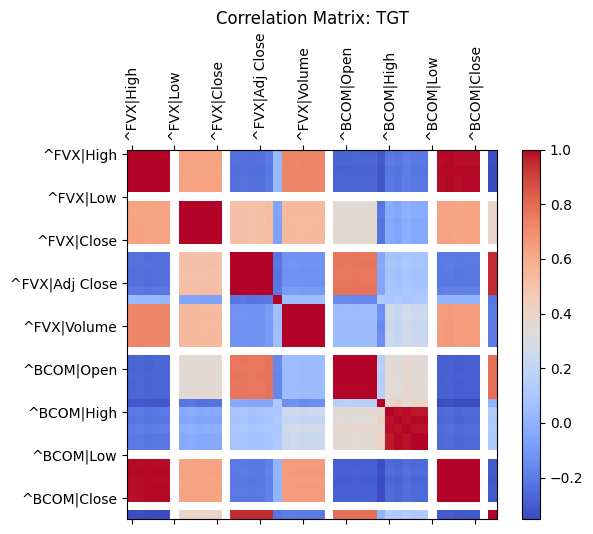

In [37]:
import matplotlib.pyplot as plt

# Iterar sobre las matrices de correlación
for tickerSymbol, correlation_matrix in correlation_matrices.items():
    # Crear una figura y un eje
    fig, ax = plt.subplots()
    
    # Crear un mapa de calor de la matriz de correlación
    cax = ax.matshow(correlation_matrix, cmap='coolwarm')
    
    # Agregar una barra de color
    fig.colorbar(cax)
    
    # Establecer las etiquetas de los ejes x e y
    ax.set_xticklabels([''] + correlation_matrix.columns, rotation=90)
    ax.set_yticklabels([''] + correlation_matrix.columns)
    
    # Mostrar el título del gráfico
    ax.set_title('Correlation Matrix: {}'.format(tickerSymbol))
    
    # Mostrar el gráfico
    plt.show()